# Importing modules

So as in subpart (a), here again we begin our process with the standard procedure of importing of required modules. 
Like above 
cv2 is for openCV
matplotlib for plotting the images
keras api using tensorflow backend
the different layers required for CNN
os for loading the images
numpy for standard numerical calculation

In [1]:
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D,Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
import numpy as np

D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

# Defining of one_hot vector

For better results let us define the one hot vector encoding for each symbol

In [2]:
#We create a function to create a one_hot vector. Although it is a list now, will be converted into an array later
def one_hot(value,size):
    arr=np.array([0]*size);
    arr[value]=1;
    return arr;

# Importing images

Next step includes loading the images into two lists defined below
Note:
    X=images loaded
    y=output one_hot vector

In [3]:
X,y=list(),list();#define empty list for loading images and output one-hot vector
#copying path and the folder contents from subpart a
path="D://datasets//IIIT_D//train";#path where the dataset is downloaded in my machine
fol=os.listdir(path)#list of files in the 'train' folder in the location D:\datasets\IIIT_D\train
size=10;
flag=0;
for val,i in enumerate(fol):
    path_n=os.path.join(path,i);
    for img_n in os.listdir(path_n):
        img=cv2.imread(os.path.join(path_n,img_n),cv2.IMREAD_GRAYSCALE)/255#normalize by dividing by 255 for better results.
        X.append((np.reshape(cv2.resize(img,(50,50)),(50,50,1))))#initially we obtained a 2d array. In order to fit it in our keras CNN model, we had to convert it into a 3d model. Also the image is downsized to avoid OOM (Out of Memory) exception
        y.append(one_hot(val,size))#store our results by converting it into a one-hot vector. Here the enumerate () returning counter val palys a very important role.
        if(val==9):
            flag=1;
            break;
    if(flag):
        break;

# Checking the inputted image for further preprocessing (if required)

We start by checking that only Samples from 0-9 have been loaded. Moreover we check the corresponding dimension of each training data and output each. Next we visualize the images of 5-6 random images to get idea of its dimension
Lastly since our data has been normalized by dividing by 255, we compare images with and without nomalization

In [4]:
print("Number of files scanned:",len(X));
print("Number of output vectors",len(y));

Number of files scanned: 361
Number of output vectors 361


In [13]:
img01=cv2.imread("D://datasets//IIIT_D//train//Sample003//img003-008.png",cv2.IMREAD_GRAYSCALE)
img02=cv2.imread("D://datasets//IIIT_D//train//Sample001//img001-010.png",cv2.IMREAD_GRAYSCALE)
img03=cv2.imread("D://datasets//IIIT_D//train//Sample008//img008-055.png",cv2.IMREAD_GRAYSCALE)
img04=cv2.imread("D://datasets//IIIT_D//train//Sample006//img006-004.png",cv2.IMREAD_GRAYSCALE)
img05=cv2.imread("D://datasets//IIIT_D//train//Sample010//img010-020.png",cv2.IMREAD_GRAYSCALE)
img11=img01/255;
img12=img02/255;
img13=img03/255;
img14=img04/255;
img15=img05/255;

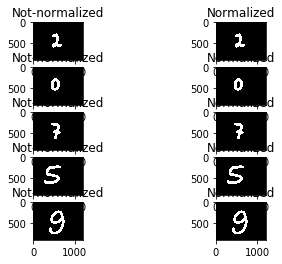

In [14]:
figure,axs=plt.subplots(5,2)
axs[0,0].imshow(img01,cmap=plt.cm.binary)
axs[0,0].set_title('Not-normalized')
axs[0,1].imshow(img11,cmap=plt.cm.binary)
axs[0,1].set_title('Normalized')
axs[1,0].imshow(img02,cmap=plt.cm.binary)
axs[1,0].set_title('Not-normalized')
axs[1,1].imshow(img12,cmap=plt.cm.binary)
axs[1,1].set_title('Normalized')
axs[2,0].imshow(img03,cmap=plt.cm.binary)
axs[2,0].set_title('Not-normalized')
axs[2,1].imshow(img13,cmap=plt.cm.binary)
axs[2,1].set_title('Normalized')
axs[3,0].imshow(img04,cmap=plt.cm.binary)
axs[3,0].set_title('Not-normalized')
axs[3,1].imshow(img14,cmap=plt.cm.binary)
axs[3,1].set_title('Normalized')
axs[4,0].imshow(img05,cmap=plt.cm.binary)
axs[4,0].set_title('Not-normalized')
axs[4,1].imshow(img15,cmap=plt.cm.binary)
axs[4,1].set_title('Normalized')
plt.show()

As the overlapping construct is very difficult to decipher let us keep only one title for each column, left one is dedicated for Not-normalized
whereas the right one is dedicated for Normalized

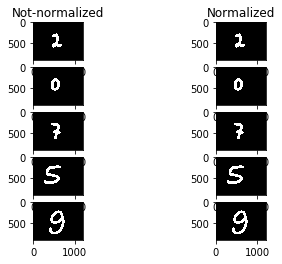

In [15]:
figure,axs=plt.subplots(5,2)
axs[0,0].imshow(img01,cmap=plt.cm.binary)
axs[0,0].set_title('Not-normalized')
axs[0,1].imshow(img11,cmap=plt.cm.binary)
axs[0,1].set_title('Normalized')
axs[1,0].imshow(img02,cmap=plt.cm.binary)
#axs[1,0].set_title('Not-normalized')
axs[1,1].imshow(img12,cmap=plt.cm.binary)
#axs[1,1].set_title('Normalized')
axs[2,0].imshow(img03,cmap=plt.cm.binary)
#axs[2,0].set_title('Not-normalized')
axs[2,1].imshow(img13,cmap=plt.cm.binary)
#axs[2,1].set_title('Normalized')
axs[3,0].imshow(img04,cmap=plt.cm.binary)
#axs[3,0].set_title('Not-normalized')
axs[3,1].imshow(img14,cmap=plt.cm.binary)
#axs[3,1].set_title('Normalized')
axs[4,0].imshow(img05,cmap=plt.cm.binary)
#axs[4,0].set_title('Not-normalized')
axs[4,1].imshow(img15,cmap=plt.cm.binary)
#axs[4,1].set_title('Normalized')
plt.show()

Ok all good we are all set with the nomalizing job and we can safely confirm that the images are not distorted or disturbed by this action.
Next we convert the training sets into numpy arrays and divide them into training and cross validation sets

# Splitting into training and cross validation sets

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15, random_state=42)
X_train_arr=np.array(X_train)
X_val_arr=np.array(X_val)
y_train_arr=np.array(y_train)
y_val_arr=np.array(y_val)
_,h,w,d=X_train_arr.shape

In [17]:
print('X_dimensions:',X_train_arr.shape)
print('y_dimensions:',y_train_arr.shape)

X_dimensions: (306, 50, 50, 1)
y_dimensions: (306, 10)


# Creation of the CNN network

Now it is time to create our Sequential CNN model. We shall start with small networks and then poceed to bigger networks. 
Number of epochs let us fix at 8 for now later if this does not works we shall modify

In [18]:
ganguly = Sequential()
ganguly.add(Conv2D(10, kernel_size=5, activation='relu',border_mode='same', input_shape=(h,w,d)))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Flatten())
ganguly.add(Dense(10, activation='softmax'))
ganguly.summary()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, kernel_size=5, activation="relu", input_shape=(50, 50, 1..., padding="same")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 10)        260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6250)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62510     
Total params: 62,770
Trainable params: 62,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
ganguly.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=8,validation_data=(X_val_arr,y_val_arr))
print(feeds.history)

Train on 306 samples, validate on 55 samples
Epoch 1/8
306/306 [==============================] - 1s 4ms/step - loss: 1.1043 - acc: 0.7092 - val_loss: 1.5456 - val_acc: 0.5273
Epoch 2/8
306/306 [==============================] - 0s 509us/step - loss: 1.0260 - acc: 0.7320 - val_loss: 1.3901 - val_acc: 0.5636
Epoch 3/8
306/306 [==============================] - 0s 503us/step - loss: 0.9165 - acc: 0.8007 - val_loss: 1.3533 - val_acc: 0.5818
Epoch 4/8
306/306 [==============================] - 0s 535us/step - loss: 0.8441 - acc: 0.8137 - val_loss: 1.3042 - val_acc: 0.6000
Epoch 5/8
306/306 [==============================] - 0s 538us/step - loss: 0.7760 - acc: 0.8170 - val_loss: 1.2880 - val_acc: 0.6000
Epoch 6/8
306/306 [==============================] - 0s 524us/step - loss: 0.7034 - acc: 0.8431 - val_loss: 1.3250 - val_acc: 0.5636
Epoch 7/8
306/306 [==============================] - 0s 541us/step - loss: 0.6582 - acc: 0.8464 - val_loss: 1.2657 - val_acc: 0.6182
Epoch 8/8
306/306 [=======

In [22]:
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

Final accuracy on the training data is: 0.8692810461412068
Cross_Validating accuracy is: 0.5818181915716691


In [23]:
ganguly = Sequential()
ganguly.add(Conv2D(20, kernel_size=5, activation='relu',border_mode='same', input_shape=(h,w,d)))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Flatten())
ganguly.add(Dense(10, activation='softmax'))
ganguly.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=8,validation_data=(X_val_arr,y_val_arr))
#print(feeds.history)
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, kernel_size=5, activation="relu", input_shape=(50, 50, 1..., padding="same")`
  


Train on 306 samples, validate on 55 samples
Epoch 1/8
306/306 [==============================] - 1s 4ms/step - loss: 2.3826 - acc: 0.1209 - val_loss: 2.2860 - val_acc: 0.0909
Epoch 2/8
306/306 [==============================] - 0s 389us/step - loss: 2.1366 - acc: 0.2157 - val_loss: 2.0238 - val_acc: 0.3818
Epoch 3/8
306/306 [==============================] - 0s 431us/step - loss: 1.9061 - acc: 0.5588 - val_loss: 1.8939 - val_acc: 0.4182
Epoch 4/8
306/306 [==============================] - 0s 497us/step - loss: 1.6757 - acc: 0.5850 - val_loss: 1.7183 - val_acc: 0.5091
Epoch 5/8
306/306 [==============================] - 0s 545us/step - loss: 1.4464 - acc: 0.6373 - val_loss: 1.6127 - val_acc: 0.5455
Epoch 6/8
306/306 [==============================] - 0s 631us/step - loss: 1.2647 - acc: 0.6895 - val_loss: 1.4945 - val_acc: 0.5636
Epoch 7/8
306/306 [==============================] - 0s 618us/step - loss: 1.1140 - acc: 0.7124 - val_loss: 1.4436 - val_acc: 0.5636
Epoch 8/8
306/306 [=======

In [24]:
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=15,validation_data=(X_val_arr,y_val_arr))
#print(feeds.history)
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

Train on 306 samples, validate on 55 samples
Epoch 1/15
306/306 [==============================] - 0s 2ms/step - loss: 0.8368 - acc: 0.7810 - val_loss: 1.3098 - val_acc: 0.6000
Epoch 2/15
306/306 [==============================] - 0s 612us/step - loss: 0.7372 - acc: 0.8268 - val_loss: 1.3003 - val_acc: 0.6364
Epoch 3/15
306/306 [==============================] - 0s 635us/step - loss: 0.6535 - acc: 0.8431 - val_loss: 1.2537 - val_acc: 0.6000
Epoch 4/15
306/306 [==============================] - 0s 612us/step - loss: 0.5805 - acc: 0.8889 - val_loss: 1.1955 - val_acc: 0.6364
Epoch 5/15
306/306 [==============================] - 0s 633us/step - loss: 0.5186 - acc: 0.8856 - val_loss: 1.2184 - val_acc: 0.6364
Epoch 6/15
306/306 [==============================] - 0s 631us/step - loss: 0.4691 - acc: 0.9052 - val_loss: 1.1906 - val_acc: 0.6545
Epoch 7/15
306/306 [==============================] - 0s 629us/step - loss: 0.4119 - acc: 0.9314 - val_loss: 1.2508 - val_acc: 0.6182
Epoch 8/15
306/306 

In [25]:
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=30,validation_data=(X_val_arr,y_val_arr))
#print(feeds.history)
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

Train on 306 samples, validate on 55 samples
Epoch 1/30
306/306 [==============================] - 0s 2ms/step - loss: 0.1756 - acc: 0.9935 - val_loss: 1.1709 - val_acc: 0.6909
Epoch 2/30
306/306 [==============================] - 0s 618us/step - loss: 0.1597 - acc: 0.9837 - val_loss: 1.1517 - val_acc: 0.6909
Epoch 3/30
306/306 [==============================] - 0s 650us/step - loss: 0.1454 - acc: 0.9935 - val_loss: 1.1920 - val_acc: 0.6909
Epoch 4/30
306/306 [==============================] - 0s 615us/step - loss: 0.1358 - acc: 0.9902 - val_loss: 1.1660 - val_acc: 0.6909
Epoch 5/30
306/306 [==============================] - 0s 637us/step - loss: 0.1263 - acc: 0.9935 - val_loss: 1.2115 - val_acc: 0.6909
Epoch 6/30
306/306 [==============================] - 0s 601us/step - loss: 0.1242 - acc: 0.9967 - val_loss: 1.1659 - val_acc: 0.6909
Epoch 7/30
306/306 [==============================] - 0s 659us/step - loss: 0.1128 - acc: 0.9935 - val_loss: 1.2144 - val_acc: 0.6909
Epoch 8/30
306/306 

#Pretty decent training accuracy but let us save this model first and then try with increasing Perceptron heads

In [26]:
ganguly.save('IIIT_D_ganguly_subpart_b.h5')

In [28]:
ganguly = Sequential()
ganguly.add(Conv2D(40, kernel_size=5, activation='relu',border_mode='same', input_shape=(h,w,d)))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Flatten())
ganguly.add(Dense(10, activation='softmax'))
ganguly.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=30,validation_data=(X_val_arr,y_val_arr))
#print(feeds.history)
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, kernel_size=5, activation="relu", input_shape=(50, 50, 1..., padding="same")`
  


Train on 306 samples, validate on 55 samples
Epoch 1/30
306/306 [==============================] - 1s 4ms/step - loss: 2.5016 - acc: 0.1209 - val_loss: 2.1533 - val_acc: 0.0727
Epoch 2/30
306/306 [==============================] - 0s 539us/step - loss: 2.0789 - acc: 0.2386 - val_loss: 2.0156 - val_acc: 0.3636
Epoch 3/30
306/306 [==============================] - 0s 554us/step - loss: 1.8577 - acc: 0.5850 - val_loss: 1.8275 - val_acc: 0.5455
Epoch 4/30
306/306 [==============================] - 0s 595us/step - loss: 1.5988 - acc: 0.6765 - val_loss: 1.7083 - val_acc: 0.4364
Epoch 5/30
306/306 [==============================] - 0s 689us/step - loss: 1.3650 - acc: 0.6634 - val_loss: 1.5066 - val_acc: 0.6000
Epoch 6/30
306/306 [==============================] - 0s 698us/step - loss: 1.1576 - acc: 0.7288 - val_loss: 1.4811 - val_acc: 0.5636
Epoch 7/30
306/306 [==============================] - 0s 674us/step - loss: 1.0248 - acc: 0.7582 - val_loss: 1.4242 - val_acc: 0.5455
Epoch 8/30
306/306 

In [30]:
ganguly = Sequential()
ganguly.add(Conv2D(20, kernel_size=5, activation='relu',border_mode='same', input_shape=(h,w,d)))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Conv2D(20, kernel_size=5, activation='relu',border_mode='same', input_shape=(h,w,d)))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Flatten())
ganguly.add(Dense(10, activation='softmax'))
ganguly.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=50,validation_data=(X_val_arr,y_val_arr))
#print(feeds.history)
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, kernel_size=5, activation="relu", input_shape=(50, 50, 1..., padding="same")`
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, kernel_size=5, activation="relu", input_shape=(50, 50, 1..., padding="same")`
  after removing the cwd from sys.path.


Train on 306 samples, validate on 55 samples
Epoch 1/50
306/306 [==============================] - 1s 4ms/step - loss: 2.2781 - acc: 0.0882 - val_loss: 2.2255 - val_acc: 0.2000
Epoch 2/50
306/306 [==============================] - 0s 554us/step - loss: 2.2004 - acc: 0.1438 - val_loss: 2.1626 - val_acc: 0.1455
Epoch 3/50
306/306 [==============================] - 0s 569us/step - loss: 2.1043 - acc: 0.2647 - val_loss: 2.0402 - val_acc: 0.4182
Epoch 4/50
306/306 [==============================] - 0s 613us/step - loss: 2.0007 - acc: 0.3529 - val_loss: 1.9199 - val_acc: 0.4000
Epoch 5/50
306/306 [==============================] - 0s 699us/step - loss: 1.8087 - acc: 0.5000 - val_loss: 1.7007 - val_acc: 0.5091
Epoch 6/50
306/306 [==============================] - 0s 645us/step - loss: 1.5899 - acc: 0.5294 - val_loss: 1.4836 - val_acc: 0.5818
Epoch 7/50
306/306 [==============================] - 0s 707us/step - loss: 1.3332 - acc: 0.6601 - val_loss: 1.3966 - val_acc: 0.4909
Epoch 8/50
306/306 

This model as you can see in the intermediate steps has lead to overfitting. Like for example epoch 43 had validation accuracy 78%
and in next epoch decreases to 72%. Then again a rise and this continues. So we discard this model but we see that it has seen some rise in validation accuracy hence we drop the epoch count here

In [36]:
ganguly = Sequential()
ganguly.add(Conv2D(20, kernel_size=5, activation='relu',border_mode='same', input_shape=(h,w,d)))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Conv2D(20, kernel_size=5, activation='relu',border_mode='same', input_shape=(h,w,d)))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Flatten())
ganguly.add(Dense(10, activation='softmax'))
ganguly.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=20,validation_data=(X_val_arr,y_val_arr))
#print(feeds.history)
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, kernel_size=5, activation="relu", input_shape=(50, 50, 1..., padding="same")`
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, kernel_size=5, activation="relu", input_shape=(50, 50, 1..., padding="same")`
  after removing the cwd from sys.path.


Train on 306 samples, validate on 55 samples
Epoch 1/20
306/306 [==============================] - 2s 7ms/step - loss: 2.2554 - acc: 0.1144 - val_loss: 2.2037 - val_acc: 0.1636
Epoch 2/20
306/306 [==============================] - 0s 610us/step - loss: 2.1679 - acc: 0.1699 - val_loss: 2.1314 - val_acc: 0.3273
Epoch 3/20
306/306 [==============================] - 0s 631us/step - loss: 2.0630 - acc: 0.3497 - val_loss: 1.9950 - val_acc: 0.3818
Epoch 4/20
306/306 [==============================] - 0s 614us/step - loss: 1.8706 - acc: 0.4248 - val_loss: 1.7894 - val_acc: 0.4727
Epoch 5/20
306/306 [==============================] - 0s 620us/step - loss: 1.5937 - acc: 0.5621 - val_loss: 1.5775 - val_acc: 0.5091
Epoch 6/20
306/306 [==============================] - 0s 621us/step - loss: 1.3715 - acc: 0.5719 - val_loss: 1.4349 - val_acc: 0.5455
Epoch 7/20
306/306 [==============================] - 0s 619us/step - loss: 1.1737 - acc: 0.6438 - val_loss: 1.3489 - val_acc: 0.5818
Epoch 8/20
306/306 

In [37]:
ganguly.save('IIIT_D_ganguly_subpart_b.h5')

# Now it is time for some analysis as to how efficient our model is working. Let us check with our previously loaded images

2 with accuracy of 0.90475285


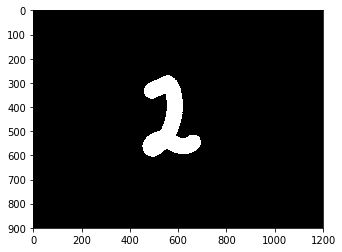

In [41]:
plt.imshow(img11,cmap=plt.cm.binary);
img1=np.reshape((cv2.resize(img11,(50,50))),(50,50,1))
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(val,"with accuracy of",acc)
plt.show()

0 with accuracy of 0.82503825


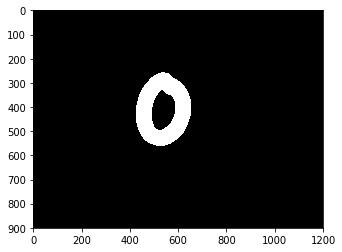

In [42]:
plt.imshow(img12,cmap=plt.cm.binary);
img1=np.reshape((cv2.resize(img12,(50,50))),(50,50,1))
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(val,"with accuracy of",acc)
plt.show()

7 with accuracy of 0.990352


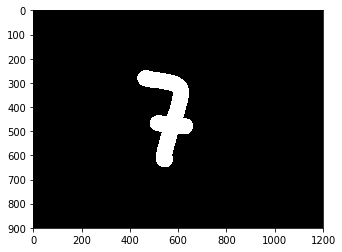

In [43]:
plt.imshow(img13,cmap=plt.cm.binary);
img1=np.reshape((cv2.resize(img13,(50,50))),(50,50,1))
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(val,"with accuracy of",acc)
plt.show()

5 with accuracy of 0.95971423


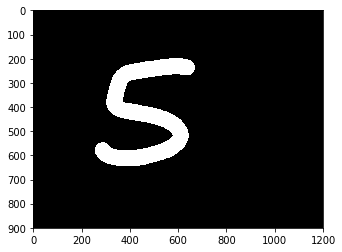

In [44]:
plt.imshow(img14,cmap=plt.cm.binary);
img1=np.reshape((cv2.resize(img14,(50,50))),(50,50,1))
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(val,"with accuracy of",acc)
plt.show()

5 with accuracy of 0.47427166


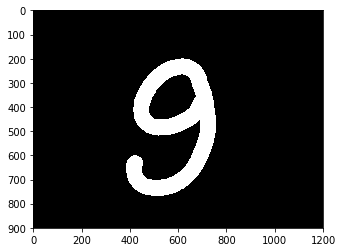

In [45]:
plt.imshow(img15,cmap=plt.cm.binary);
img1=np.reshape((cv2.resize(img15,(50,50))),(50,50,1))
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(val,"with accuracy of",acc)
plt.show()